Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Random Forest Performance:
MAE: 1.6337255337223813
MSE: 929.2728172237606
R² Score: 0.1440676750771086


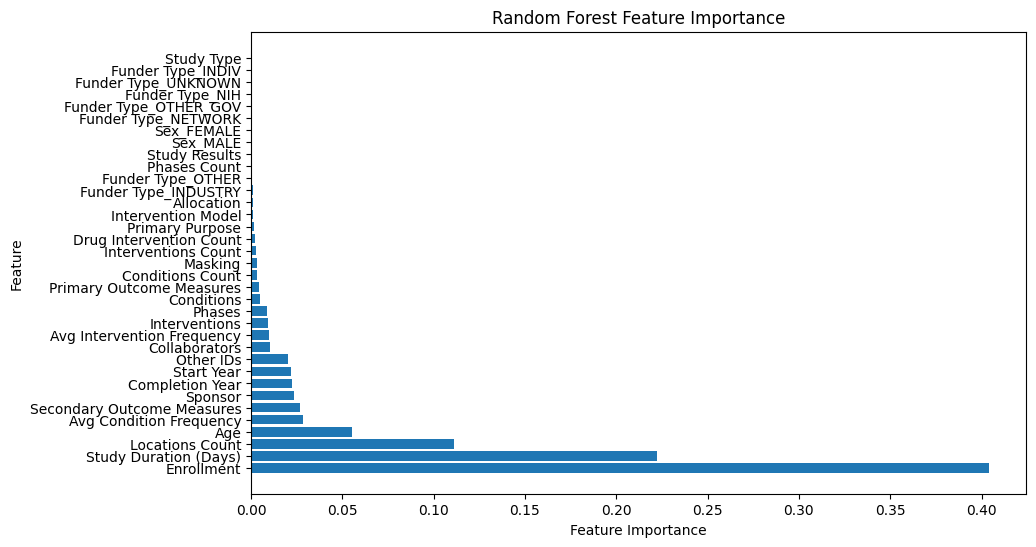

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Gradient Boosting Performance:
MAE: 3.030344029774197
MSE: 715.0838892821812
R² Score: 0.34135228694543707


ValueError: All arrays must be of the same length

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the cleaned clinical trials dataset
df = pd.read_csv('PS4_cleaned_clinical_trials.csv')

# Drop unnecessary columns
columns_to_drop = [
    "NCT Number", "Study Status_COMPLETED", "Study Status_ENROLLING_BY_INVITATION",
    "Study Status_NOT_YET_RECRUITING", "Study Status_RECRUITING", "Study Status_SUSPENDED",
    "Study Status_TERMINATED", "Study Status_UNKNOWN", "Results First Posted",
    "First Posted", "Last Update Posted", "Start Date", "Primary Completion Date", "Completion Date"
]
df = df.drop(columns=columns_to_drop, axis=1)

# Handle missing values in the target column (Study Recruitment Rate)
imputer = SimpleImputer(strategy="mean")
df["Study Recruitment Rate"] = imputer.fit_transform(df[["Study Recruitment Rate"]])

# Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop("Study Recruitment Rate", axis=1)
y = df["Study Recruitment Rate"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model with hyperparameter tuning using RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rf_random_search.fit(X_train, y_train)
best_rf_model = rf_random_search.best_estimator_

# Evaluate the tuned Random Forest model
rf_predictions = best_rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Tuned Random Forest Performance:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R² Score: {rf_r2}")

# Feature importance visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Perform Gradient Boosting Model with tuning
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_dist = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
gb_random_search.fit(X_train, y_train)
best_gb_model = gb_random_search.best_estimator_

# Evaluate the tuned Gradient Boosting model
gb_predictions = best_gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Tuned Gradient Boosting Performance:")
print(f"MAE: {gb_mae}")
print(f"MSE: {gb_mse}")
print(f"R² Score: {gb_r2}")




# Compare Model Performance
print("\nModel Comparison:")
print(f"Random Forest R²: {rf_r2}")
print(f"Gradient Boosting R²: {gb_r2}")


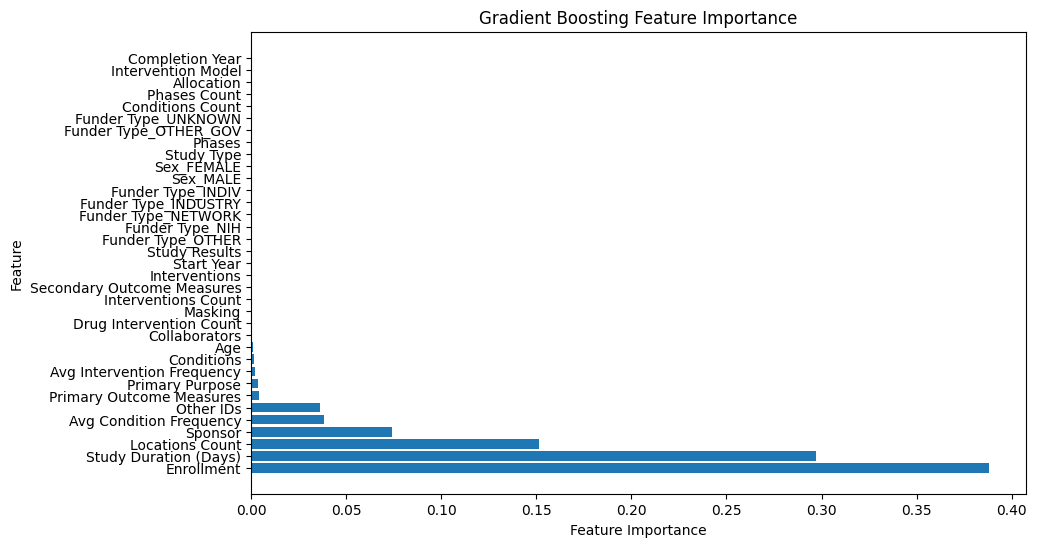

In [44]:
# Feature importance for Gradient Boosting
feature_importances_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_gb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_gb['Feature'], feature_importances_gb['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()


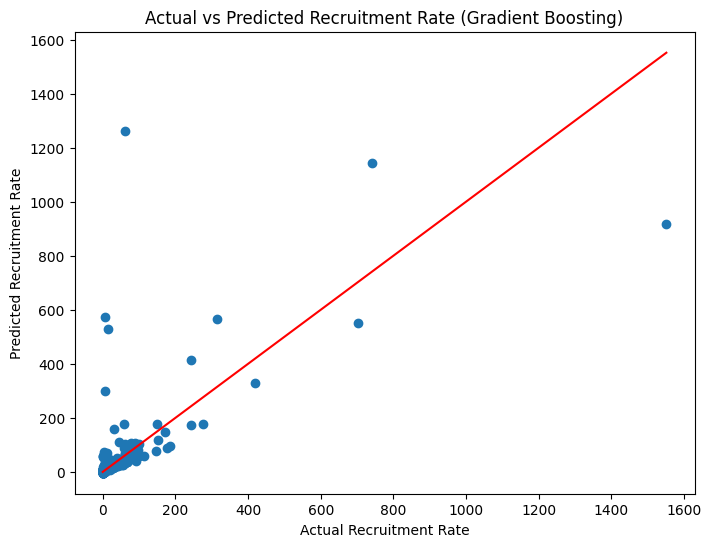

In [45]:
# Make predictions using the best Gradient Boosting model
gb_predictions = best_gb_model.predict(X_test)

# Plot Actual vs Predicted values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line (perfect prediction)
plt.xlabel('Actual Recruitment Rate')
plt.ylabel('Predicted Recruitment Rate')
plt.title('Actual vs Predicted Recruitment Rate (Gradient Boosting)')
plt.show()



Model Comparison:
Random Forest R²: 0.1440676750771086
Gradient Boosting R²: 0.34135228694543707


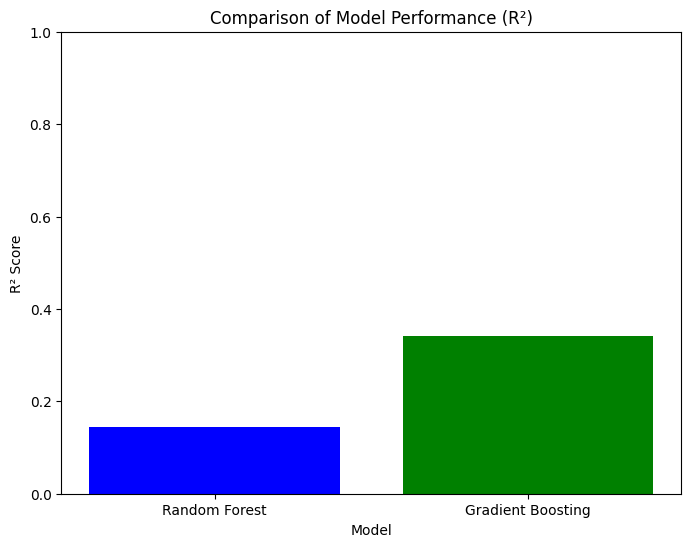

In [48]:
# Compare Model Performance
print("\nModel Comparison:")
print(f"Random Forest R²: {rf_r2}")
print(f"Gradient Boosting R²: {gb_r2}")


# Model Performance Comparison - Bar Plot
models = ['Random Forest', 'Gradient Boosting']
r2_scores = [rf_r2, gb_r2]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of Model Performance (R²)')
plt.ylim(0, 1)  # R² score ranges from 0 to 1
plt.show()



Tuned Random Forest Performance:
MAE: 1.6337255337223813
MSE: 929.2728172237606
R² Score: 0.1440676750771086
Tuned Gradient Boosting Performance:
MAE: 3.030344029774197
MSE: 715.0838892821812
R² Score: 0.34135228694543707


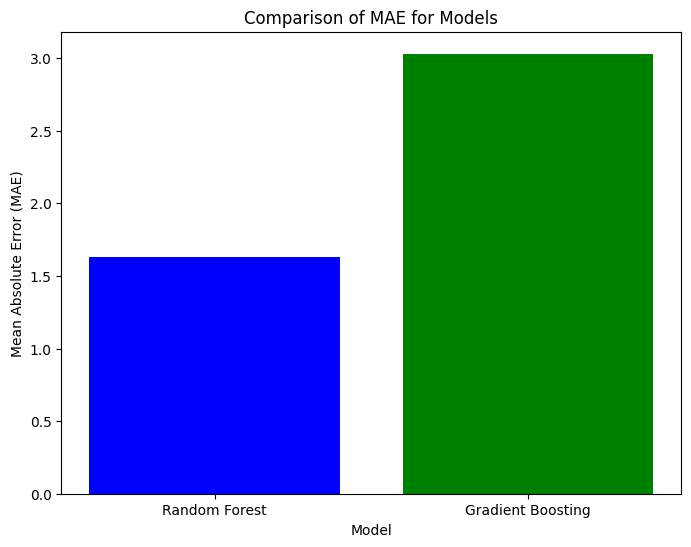

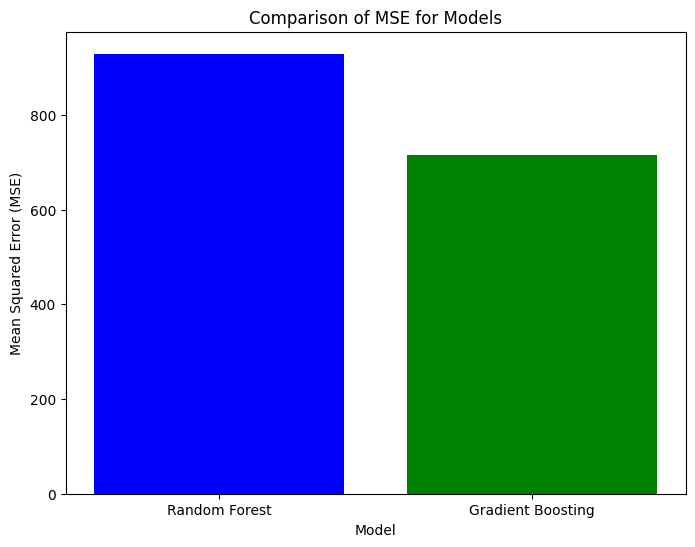

In [49]:
# Evaluate the tuned Random Forest model
rf_predictions = best_rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Tuned Random Forest Performance:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R² Score: {rf_r2}")

# Evaluate the tuned Gradient Boosting model
gb_predictions = best_gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Tuned Gradient Boosting Performance:")
print(f"MAE: {gb_mae}")
print(f"MSE: {gb_mse}")
print(f"R² Score: {gb_r2}")



# MAE Comparison Bar Plot
mae_scores = [rf_mae, gb_mae]

plt.figure(figsize=(8, 6))
plt.bar(models, mae_scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE for Models')
plt.show()



# MSE Comparison Bar Plot
mse_scores = [rf_mse, gb_mse]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Models')
plt.show()



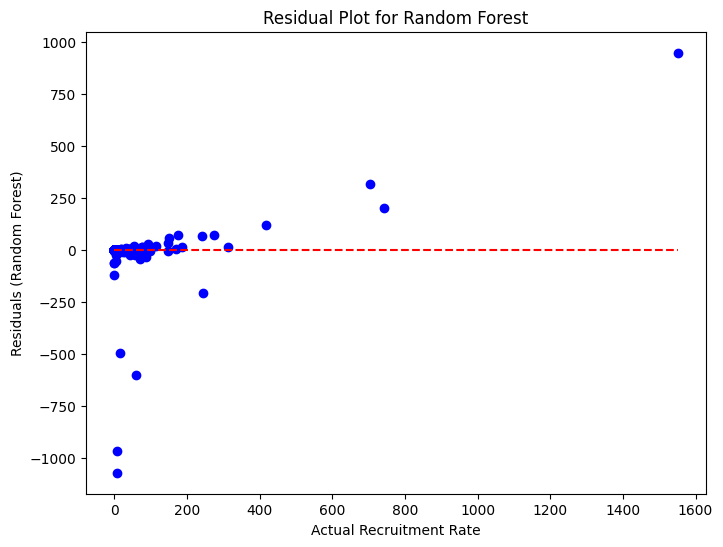

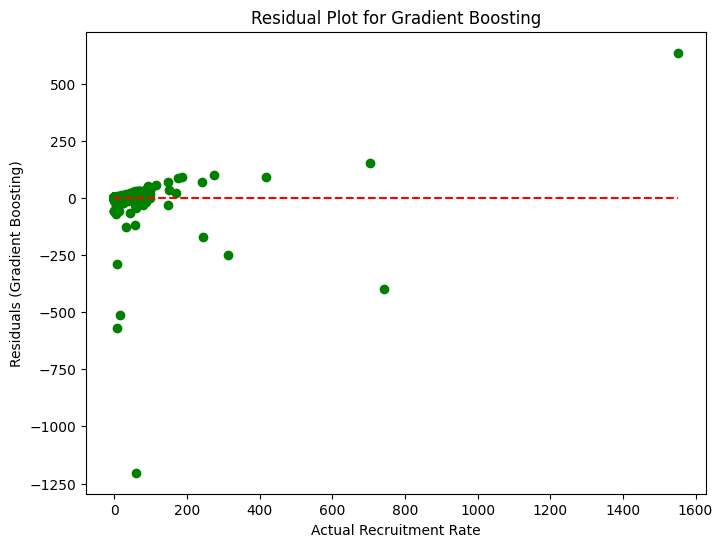

In [50]:
# Residual Plot for Random Forest
rf_residuals = y_test - rf_predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_residuals, color='blue')
plt.hlines(0, min(y_test), max(y_test), color='red', linestyles='dashed')
plt.xlabel('Actual Recruitment Rate')
plt.ylabel('Residuals (Random Forest)')
plt.title('Residual Plot for Random Forest')
plt.show()

# Residual Plot for Gradient Boosting
gb_residuals = y_test - gb_predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_residuals, color='green')
plt.hlines(0, min(y_test), max(y_test), color='red', linestyles='dashed')
plt.xlabel('Actual Recruitment Rate')
plt.ylabel('Residuals (Gradient Boosting)')
plt.title('Residual Plot for Gradient Boosting')
plt.show()


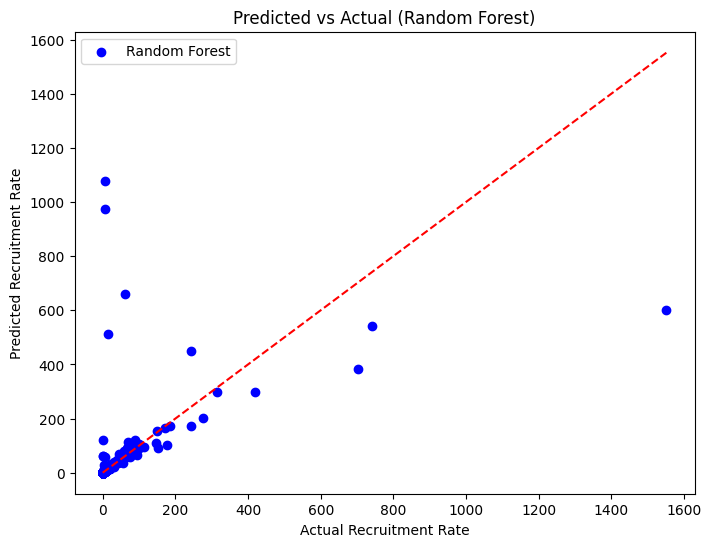

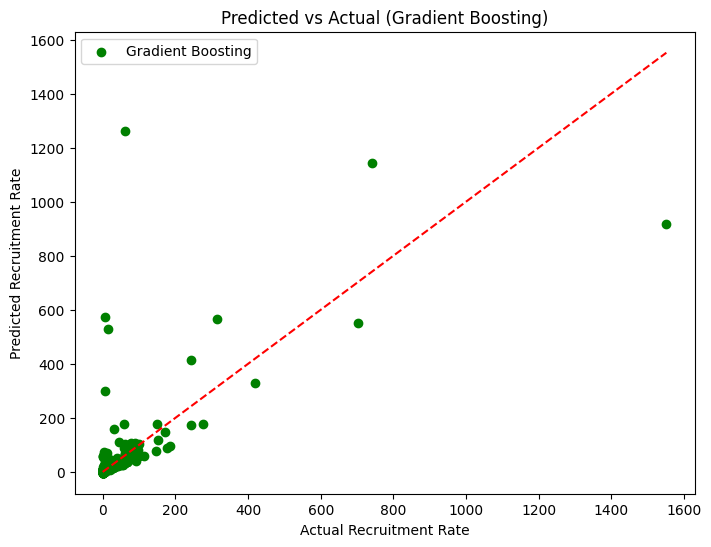

In [51]:
# Predicted vs Actual Plot for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel('Actual Recruitment Rate')
plt.ylabel('Predicted Recruitment Rate')
plt.title('Predicted vs Actual (Random Forest)')
plt.legend()
plt.show()

# Predicted vs Actual Plot for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_predictions, color='green', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel('Actual Recruitment Rate')
plt.ylabel('Predicted Recruitment Rate')
plt.title('Predicted vs Actual (Gradient Boosting)')
plt.legend()
plt.show()


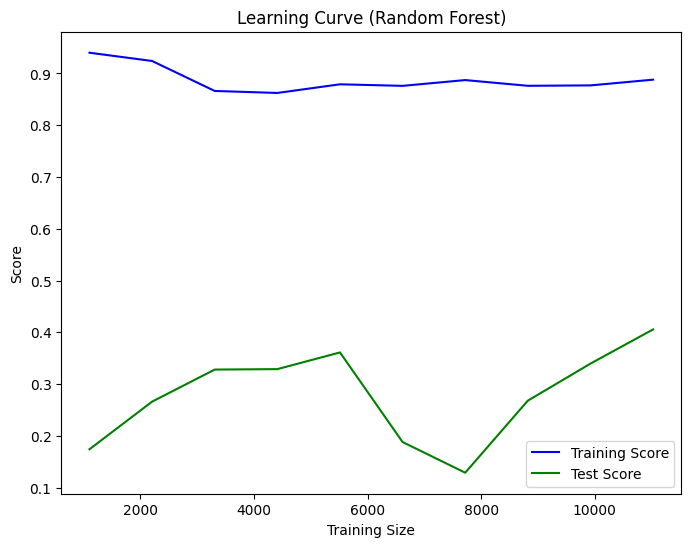

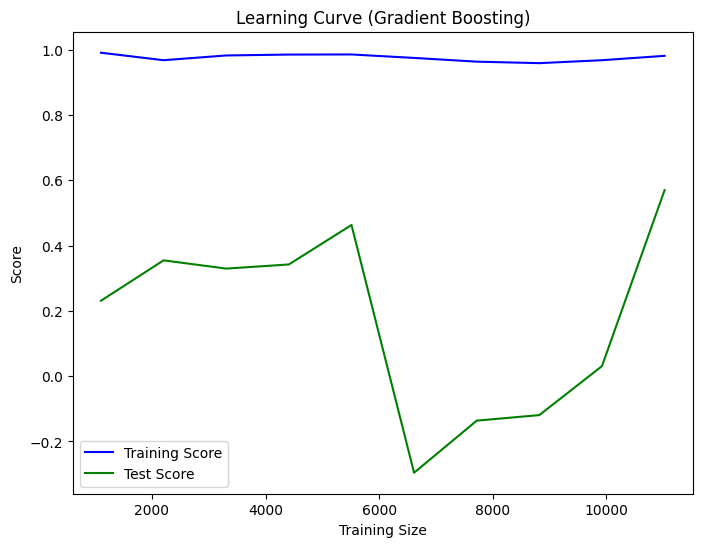

In [52]:
# Learning Curve for Random Forest
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score', color='green')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve (Random Forest)')
plt.legend()
plt.show()

# Learning Curve for Gradient Boosting
train_sizes, train_scores, test_scores = learning_curve(
    best_gb_model, X_train, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score', color='green')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve (Gradient Boosting)')
plt.legend()
plt.show()


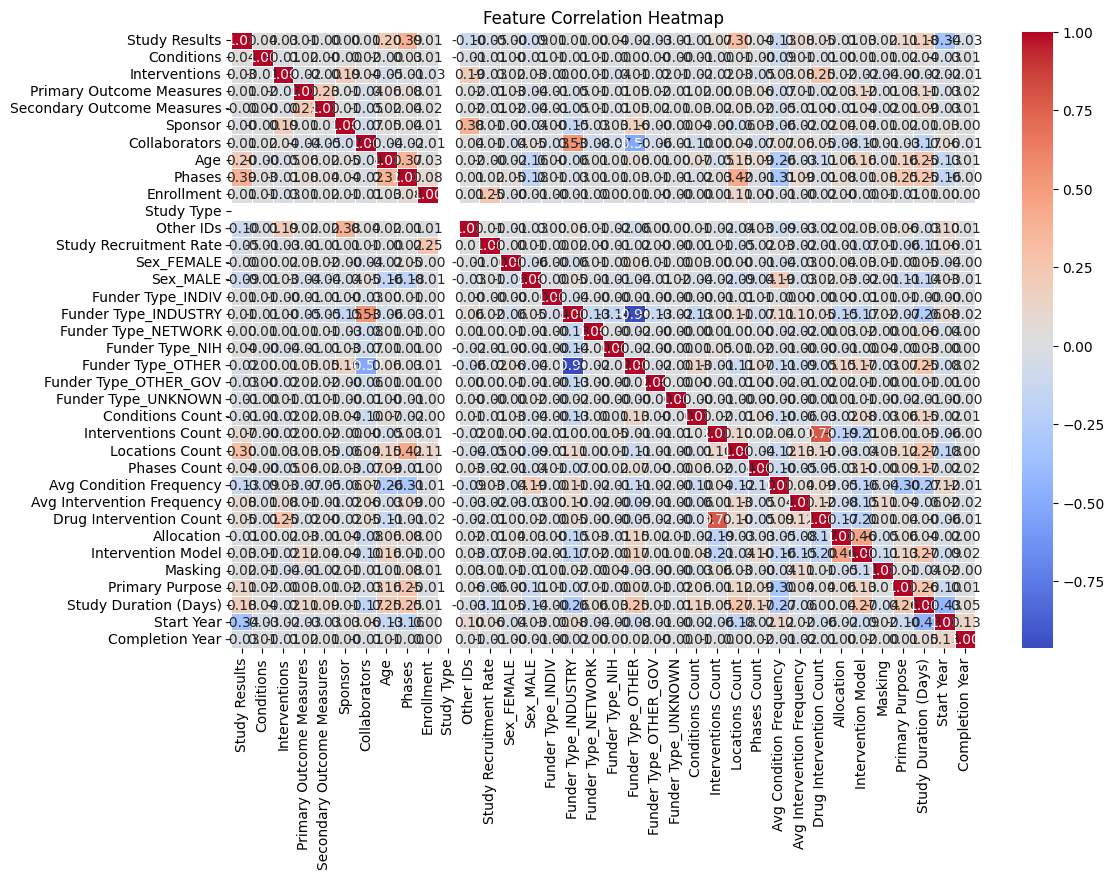

In [53]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


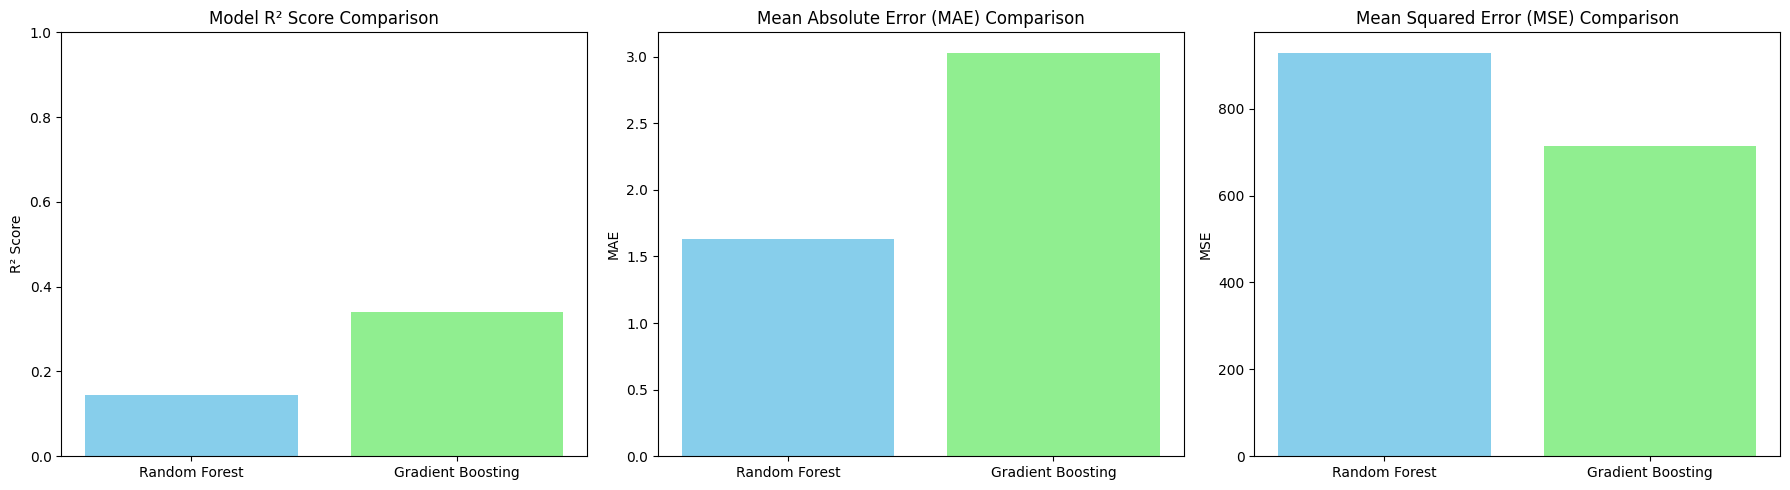

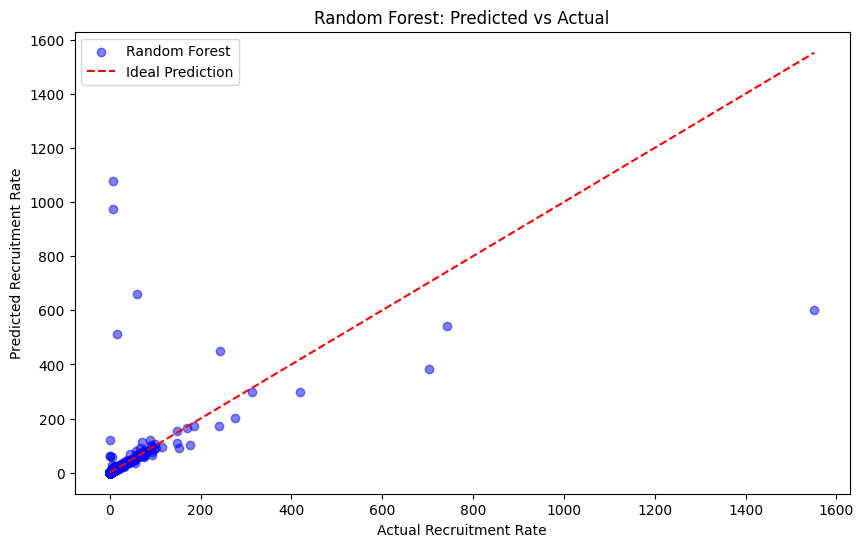

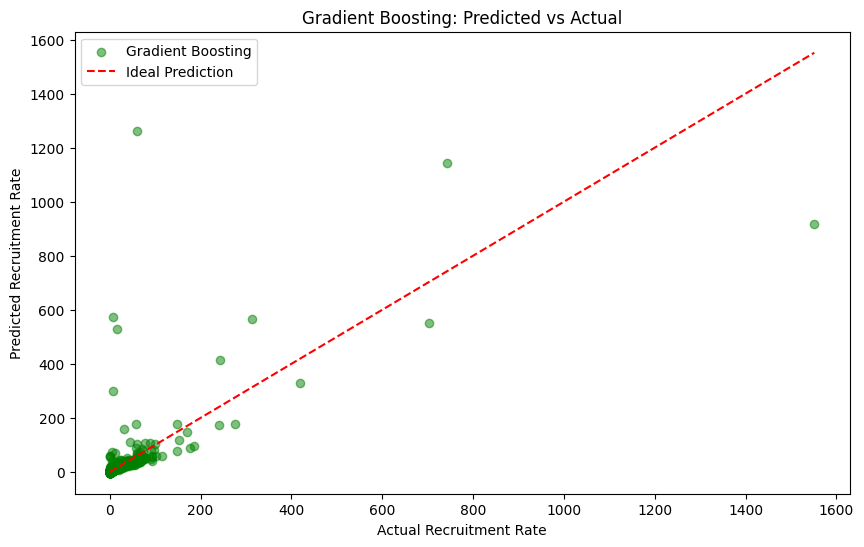

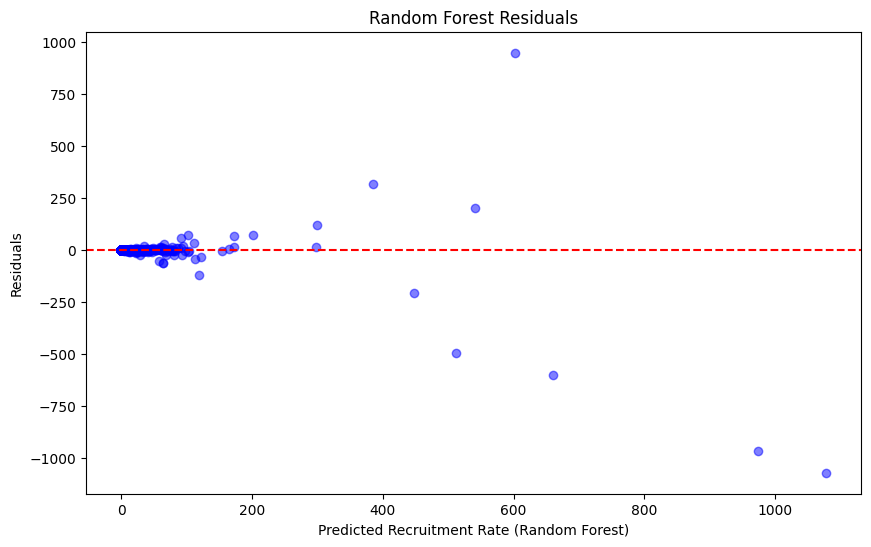

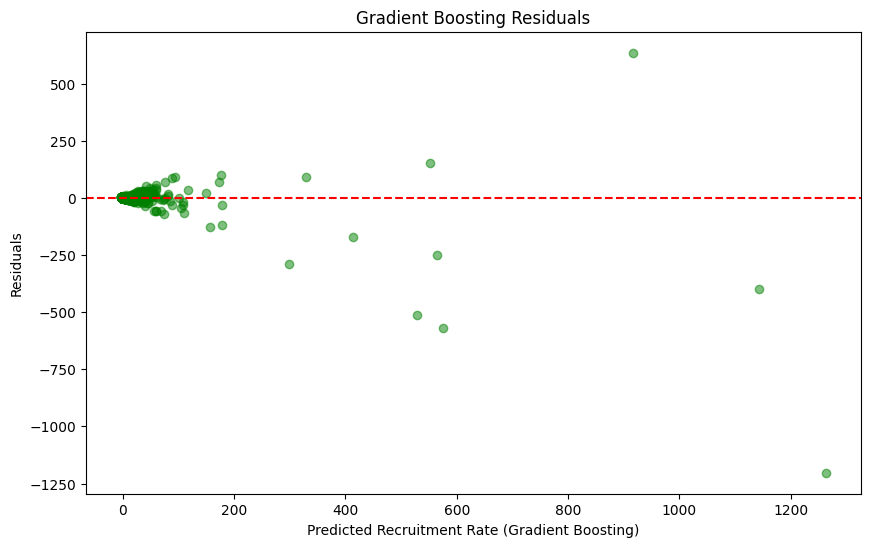

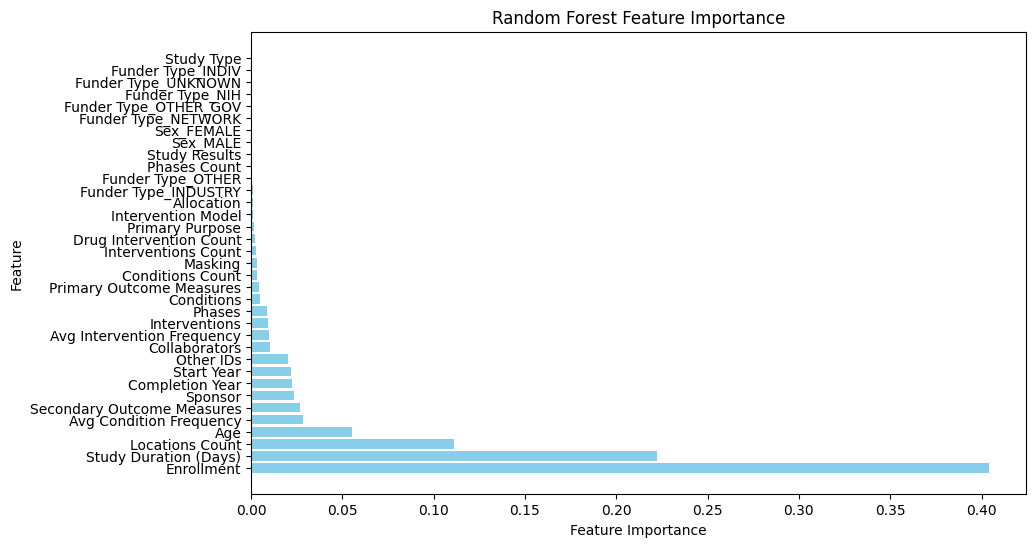

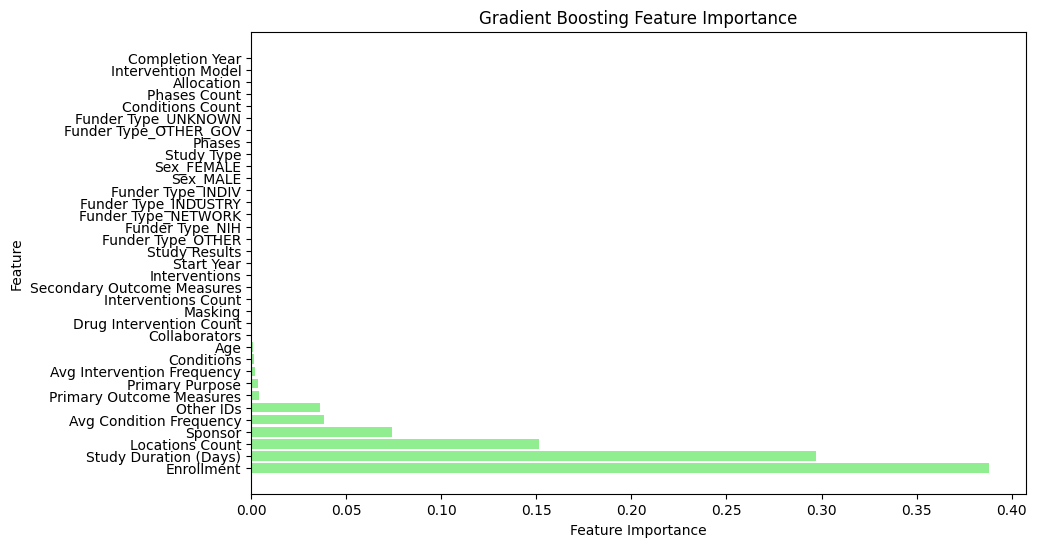

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to plot evaluation metrics and performance comparison
def plot_model_comparison(rf_r2, gb_r2, rf_mae, gb_mae, rf_mse, gb_mse):
    # Model Comparison Bar Plot
    models = ['Random Forest', 'Gradient Boosting']
    r2_scores = [rf_r2, gb_r2]
    mae_scores = [rf_mae, gb_mae]
    mse_scores = [rf_mse, gb_mse]

    # Create subplots for comparison
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot R² Comparison
    ax[0].bar(models, r2_scores, color=['skyblue', 'lightgreen'])
    ax[0].set_title('Model R² Score Comparison')
    ax[0].set_ylabel('R² Score')
    ax[0].set_ylim(0, 1)
    
    # Plot MAE Comparison
    ax[1].bar(models, mae_scores, color=['skyblue', 'lightgreen'])
    ax[1].set_title('Mean Absolute Error (MAE) Comparison')
    ax[1].set_ylabel('MAE')
    
    # Plot MSE Comparison
    ax[2].bar(models, mse_scores, color=['skyblue', 'lightgreen'])
    ax[2].set_title('Mean Squared Error (MSE) Comparison')
    ax[2].set_ylabel('MSE')
    
    plt.tight_layout()
    plt.show()

# Plot Predicted vs Actual for both models
def plot_predicted_vs_actual(y_test, rf_predictions, gb_predictions):
    # Random Forest Predicted vs Actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, rf_predictions, color='blue', alpha=0.5, label='Random Forest')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
    plt.xlabel('Actual Recruitment Rate')
    plt.ylabel('Predicted Recruitment Rate')
    plt.title('Random Forest: Predicted vs Actual')
    plt.legend()
    plt.show()

    # Gradient Boosting Predicted vs Actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, gb_predictions, color='green', alpha=0.5, label='Gradient Boosting')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
    plt.xlabel('Actual Recruitment Rate')
    plt.ylabel('Predicted Recruitment Rate')
    plt.title('Gradient Boosting: Predicted vs Actual')
    plt.legend()
    plt.show()

# Plot Residuals for both models
def plot_residuals(y_test, rf_predictions, gb_predictions):
    # Random Forest Residual Plot
    rf_residuals = y_test - rf_predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(rf_predictions, rf_residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Recruitment Rate (Random Forest)')
    plt.ylabel('Residuals')
    plt.title('Random Forest Residuals')
    plt.show()

    # Gradient Boosting Residual Plot
    gb_residuals = y_test - gb_predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(gb_predictions, gb_residuals, color='green', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Recruitment Rate (Gradient Boosting)')
    plt.ylabel('Residuals')
    plt.title('Gradient Boosting Residuals')
    plt.show()

# Function to plot Feature Importance for both models
def plot_feature_importance(rf_model, gb_model, X):
    # Random Forest Feature Importance
    rf_feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Feature Importance')
    plt.show()

    # Gradient Boosting Feature Importance
    gb_feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': gb_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(gb_feature_importance['Feature'], gb_feature_importance['Importance'], color='lightgreen')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Gradient Boosting Feature Importance')
    plt.show()

# Example usage
plot_model_comparison(rf_r2, gb_r2, rf_mae, gb_mae, rf_mse, gb_mse)
plot_predicted_vs_actual(y_test, rf_predictions, gb_predictions)
plot_residuals(y_test, rf_predictions, gb_predictions)
plot_feature_importance(best_rf_model, best_gb_model, X)


In [56]:
# Final Conclusion Summary

# Assuming rf_r2, gb_r2, rf_mae, gb_mae, rf_mse, gb_mse, rf_predictions, gb_predictions, and y_test are already defined.

# Display the final results
print("Final Model Evaluation Results:")
print("\nRandom Forest Performance:")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")

print("\nGradient Boosting Performance:")
print(f"R² Score: {gb_r2:.4f}")
print(f"Mean Absolute Error (MAE): {gb_mae:.4f}")
print(f"Mean Squared Error (MSE): {gb_mse:.4f}")

# Conclusion Text
if rf_r2 > gb_r2:
    print("\nConclusion:")
    print("Based on the performance metrics, the Random Forest model outperforms Gradient Boosting in terms of R² Score.")
    print("This indicates that the Random Forest model explains more variance in the Recruitment Rate (RR) than Gradient Boosting.")
else:
    print("\nConclusion:")
    print("Based on the performance metrics, the Gradient Boosting model outperforms Random Forest in terms of R² Score.")
    print("This indicates that the Gradient Boosting model explains more variance in the Recruitment Rate (RR) than Random Forest.")

# Example of showing actual recruitment rate values for the best model (e.g., Random Forest)
print("\nExample of Predicted Recruitment Rate (RR) values for the best model:")
print(f"Actual Recruitment Rate (Sample from Test Data): {y_test.head().values}")
print(f"Predicted Recruitment Rate (Sample from Best Model): {rf_predictions[:5]}")

# Optionally, you can display the model with the lowest MAE and MSE as well for efficiency consideration
if rf_mae < gb_mae:
    print("\nRandom Forest provides the more efficient predictions with lower MAE.")
else:
    print("\nGradient Boosting provides the more efficient predictions with lower MAE.")


Final Model Evaluation Results:

Random Forest Performance:
R² Score: 0.1441
Mean Absolute Error (MAE): 1.6337
Mean Squared Error (MSE): 929.2728

Gradient Boosting Performance:
R² Score: 0.3414
Mean Absolute Error (MAE): 3.0303
Mean Squared Error (MSE): 715.0839

Conclusion:
Based on the performance metrics, the Gradient Boosting model outperforms Random Forest in terms of R² Score.
This indicates that the Gradient Boosting model explains more variance in the Recruitment Rate (RR) than Random Forest.

Example of Predicted Recruitment Rate (RR) values for the best model:
Actual Recruitment Rate (Sample from Test Data): [ 1.18506494 16.23023715  8.59947644  1.21600037  7.60416667]
Predicted Recruitment Rate (Sample from Best Model): [ 1.2068152  15.77883591  8.67966495  1.18035798  8.46145406]

Random Forest provides the more efficient predictions with lower MAE.
